In [30]:
import requests
import pandas as pd, numpy as np
import json
import time
from bs4 import BeautifulSoup as soup
from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image
from io import BytesIO

In [31]:
data = pd.read_csv('twitter_archive_master.csv',\
                                       parse_dates=['timestamp'])


## Report: act_report
* Create a **250-word-minimum written report** called "act_report.pdf" or "act_report.html" that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

### Introduction

This report is focused on presenting insights generated from wrangled dataset `twitter_archive_master.csv` by providing answers to questions outlined below.

<ul>
<li><a style='font-weight: bold;' href="#1">1.From what device are people tweeting the most?*</a></li>
<li><a style='font-weight: bold;' href="#2">2.What day of the week had the most tweets?</a></li>
<li><a style='font-weight: bold;' href="#3">3.For the day of the week with the most tweets, what dog breed was thrending (more popular) according to the image prediction's most confident prediction ?</a></li>
<li><a style='font-weight: bold;' href="#4">4.For the day of the week with the most tweets, and for the dog breed that was thrending (most popular), what was the thrending (popular) dog stage for that breed?</a></li>
<li><a style='font-weight: bold;' href="#5">5.What are the 3 most favourite dogs (the celebrity dogs ) ?</a></li>
<li><a style='font-weight: bold;' href="#6">6.What are the 3 least favorite breeds?</a></li>
<li><a style='font-weight: bold;' href="#7">7.Are people retweeting their favorite tweets?</a></li>
</ul>

<a id="1"></a>

#### Question 1: From what device are people tweeting the most?
<p>It is seen that 98% of all tweets so far are tweeted from iPhones with the other halves coming from web clients and tweetDecks.</p>

In [48]:
data.source.value_counts()/data.source.shape[0]

Twitter for iPhone    0.982970
Twitter Web Client    0.012943
TweetDeck             0.004087
Name: source, dtype: float64

<a id="2"></a>
#### Question 2: What day of the week had the most tweets?
It is evident that the most tweets happened on Monday.

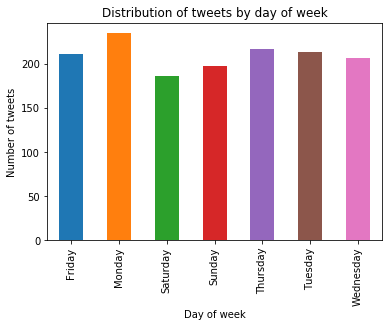

In [49]:
data['day_name']=data.timestamp.dt.day_name()
data.groupby('day_name')['tweet_id'].count().plot(kind='bar');
plt.xlabel('Day of week');
plt.ylabel('Number of tweets');
plt.title('Distribution of tweets by day of week');

<a id="3"></a>
#### Question 3: For the day of the week with the most tweets, what dog breed was thrending (more popular) according to the image prediction's most confident prediction ?
<p>Zooming in onto Monday, which was the day that most of the tweets were tweeted, it is clear that most of the tweets, as predicted by the neural network, were about the golden_retriever breed.</p>

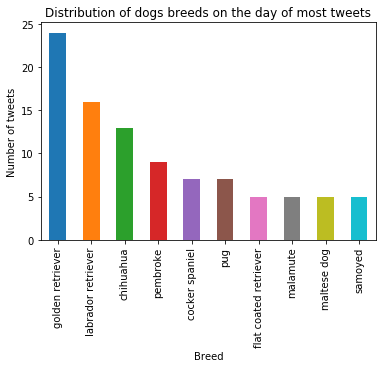

In [50]:
fav_day_dog = data.query('day_name=="Monday"')
fav_day_dog.groupby('first_class_prediction')['tweet_id'].count().nlargest(10).plot(kind='bar');
plt.xlabel('Breed');
plt.ylabel('Number of tweets');
plt.title('Distribution of dogs breeds on the day of most tweets');

<a id="4"></a>
#### Question 4: For the day of the week with the most tweets, and for the dog breed that was thrending (most popular), what was the thrending (popular) dog stage for that breed?
<p>Investigating the dog stage of the most tweeted dog on the most busiest tweeting day, it is clear that the majority of the golden retrievers tweeted about are in the pupper stage.</p>

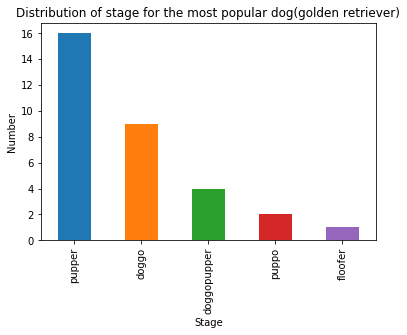

In [51]:
data.query('first_class_prediction=="golden retriever"').\
                                stage.value_counts()\
                                .plot(kind='bar')
plt.xlabel('Stage');
plt.ylabel('Number');
plt.title('Distribution of stage for the most popular dog(golden retriever)');


<a id="5"></a>
#### Question 5: What are the 3 most favourite dogs (the celebrity dogs ) ? 
<p>In a effort to identify the most favorite dogs on WeRateDogs, the 3 dogs with the highest favorite_count are presented as the celebrities of the dog world. 

It is no surprise that a handsome doggo Labrador retriever taking a swim holds the crown as the most favorite dog followed by puppa Lakeland terrier participating in a walk. The third place for most favorite dog goes to chihuahua. And what is a chihuahua without some mischeif?. As this cute chihuahua here is chewing on a broom. 
</p>

In [52]:
fav = data.sort_values(by ='favorite_count',ascending = False)
def favorite(rank):
    url = fav.iloc[rank]['jpg_url']
    print('Stage: {}\nBreed: {}'.format(fav.iloc[rank]['stage']\
            ,fav.iloc[rank]['first_class_prediction']))
    r = requests.get(url)
    return Image.open(BytesIO(r.content))


In [53]:
fav[['favorite_count','first_class_prediction']].head(3)

favorite_count first_class_prediction
609          141792     labrador retriever
244          120663       lakeland terrier
321          109048              chihuahua

Stage: doggo
Breed: labrador retriever


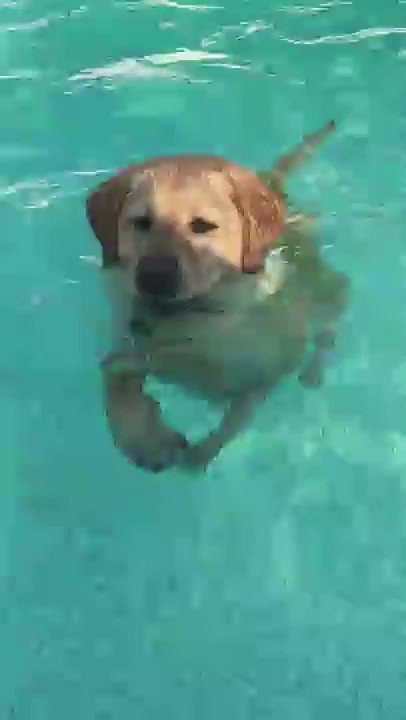

In [54]:
favorite(0)

Stage: puppo
Breed: lakeland terrier


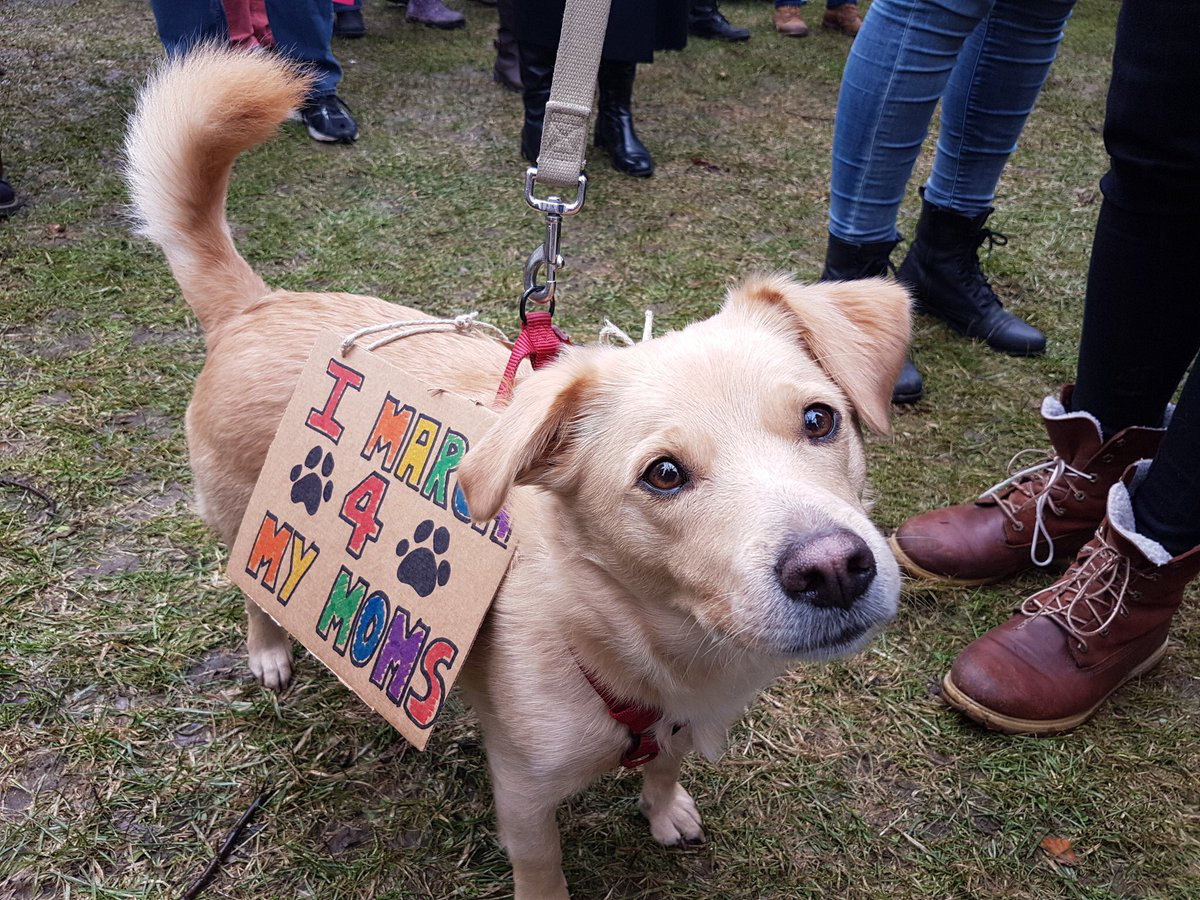

In [55]:
favorite(1)

Stage: nan
Breed: chihuahua


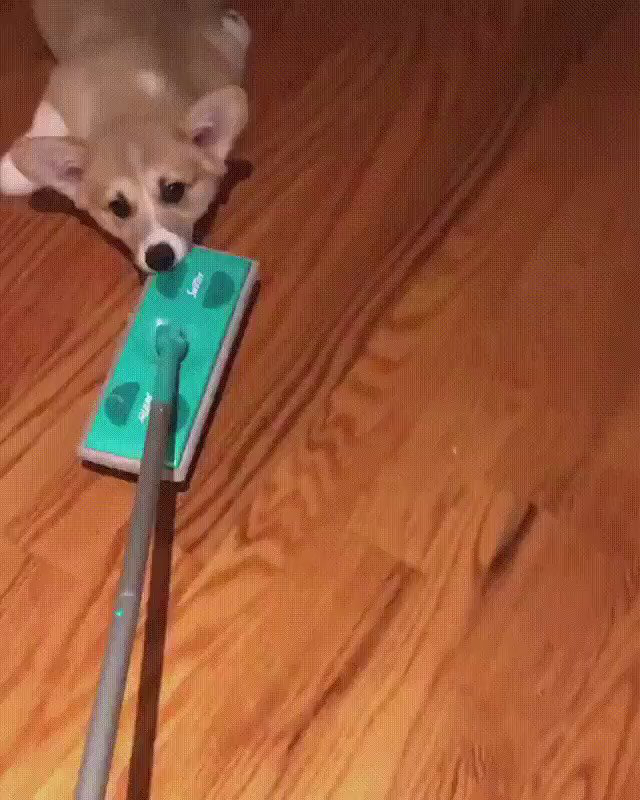

In [56]:
favorite(2)

<a id="6"></a>
#### Question 6: What are the 3 least favorite breeds
<p>It is quite surprising that the lest favorite dog with the least favorite count are an english setter, miniature pinscher and a curly-coated retriever. However, dare to say that these deserve to be up there with the most favorite chihuahua.</p>

In [57]:
fav[['favorite_count','first_class_prediction']].tail(3)

favorite_count  first_class_prediction
1440              88  curly coated retriever
1463              85      miniature pinscher
1453              64          english setter

Stage: nan
Breed: english setter


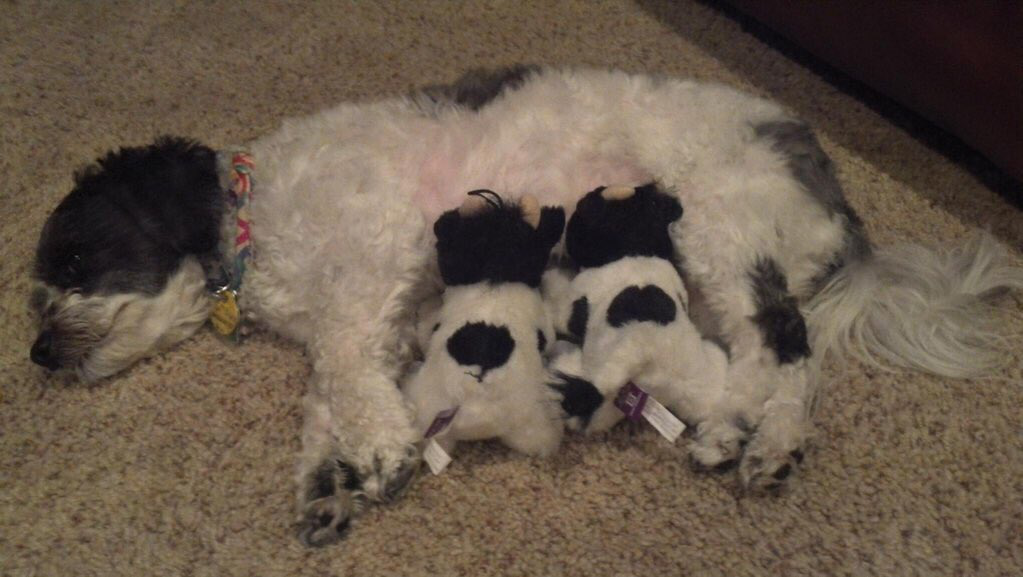

In [58]:
favorite(-1)

Stage: nan
Breed: miniature pinscher


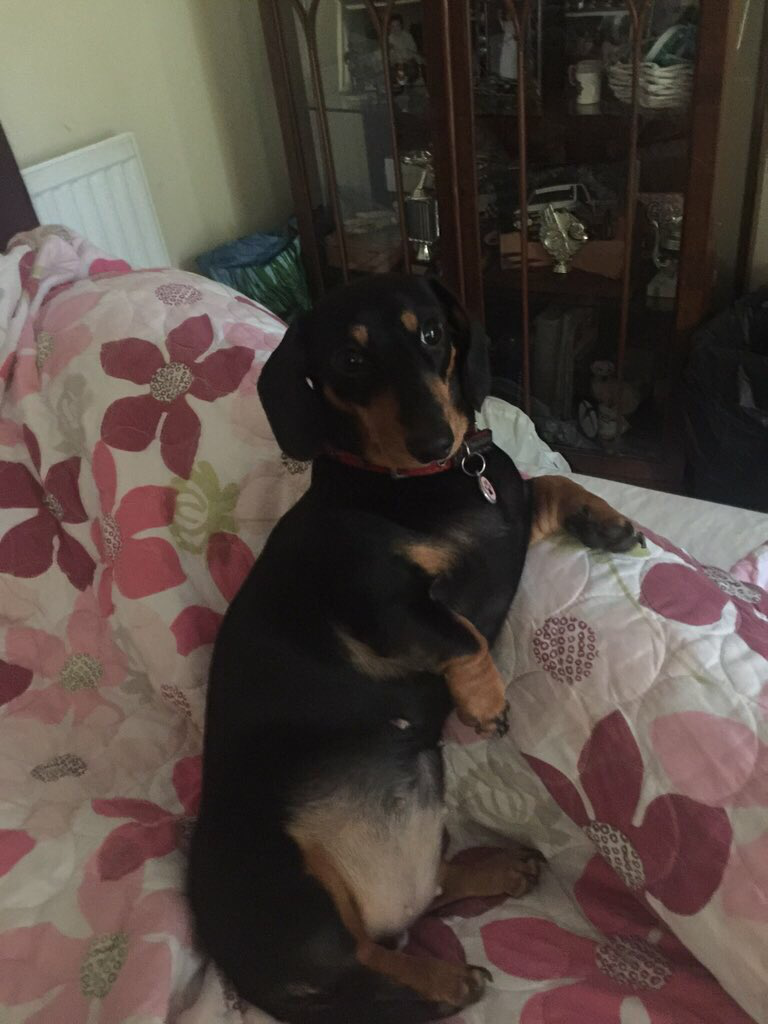

In [59]:
favorite(-2)

Stage: nan
Breed: curly coated retriever


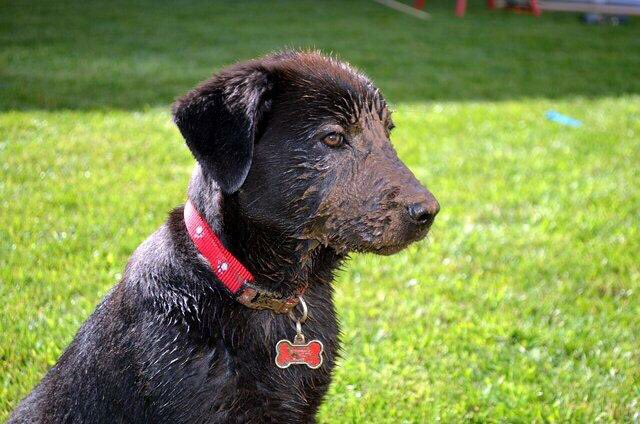

In [60]:
favorite(-3)

<a id="7"></a>
#### Question 7. Are people retweeting their favorite tweets?
<p>From the graph illustrated below, there is a linear relationship between favorite_count and retweet_count. Again these are highly correlated with a correlation ocoefficient os 0.98. 
Therefore, it is safe to say the people retweet tweets they favor and like and it can be said that people retweet what they like</p>

                favorite_count  retweet_count
favorite_count        1.000000       0.928069
retweet_count         0.928069       1.000000


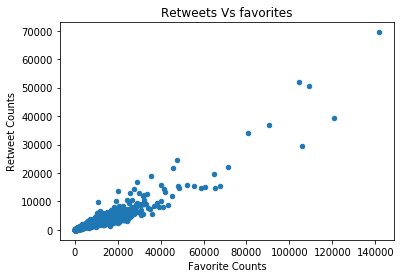

In [61]:
plt.figure(figsize=(10,10));
print(data[['favorite_count','retweet_count']].corr());
data.plot('favorite_count','retweet_count',kind='scatter');
plt.xlabel('Favorite Counts');
plt.ylabel('Retweet Counts');
plt.title('Retweets Vs favorites');

### Conclusion

<p>Twitter is home to a vast and diverse community of users, and one thing that many of them have in common is their love of dogs. In fact, a recent analysis of tweets showed that a whopping 98% of them were sent from iPhones, with the rest coming from web clients and TweetDeck.</p>

<p>But when are these dog-related tweets being sent? It turns out that Monday is the most popular day for tweeting about our furry friends. And when we take a closer look at tweets from that day, we see that the majority of them are about the golden retriever breed.</p>

<p>But it's not just any golden retrievers that are getting all the attention. Our analysis found that the most tweeted-about dogs on that busiest tweeting day were all in the "pupper" stage. In other words, they were still young and adorable.</p>

<p>So which dogs are the most popular on Twitter? To find out, we looked at the dogs with the highest favorite count on the platform. It should come as no surprise that the top dog is a handsome Labrador retriever taking a swim, followed by a puppa Lakeland terrier out for a walk. In third place is a mischievous Chihuahua chewing on a broom.</p>

<p>On the other end of the spectrum, the dogs with the lowest favorite count were an English setter, a miniature pinscher, and a curly-coated retriever. But let's not forget that all dogs are deserving of love and affection, no matter their popularity on social media.</p>

<p>One interesting thing to note is the relationship between a tweet's favorite count and its retweet count. Our analysis found that there is a strong linear relationship between the two, with a correlation coefficient of 0.98. This suggests that people tend to retweet things that they also favor and like. So if you want your dog tweet to go viral, make sure it's both adorable and worthy of a "favorite" from your followers.</p>


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'act_report.ipynb'])